In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm

# Parameters
initial_temperature = 100
cooling = 0.95  
x_upper_bound = 1
x_lower_bound = 0
y_upper_bound = 1
y_lower_bound = 0
epsilon = 0.01  # small value to exclude exact boundary values

def objective_function(solution, a, b):
    x, y = solution
    return -((2.18**2 + b**2)+(2.18 - 2.18**2)*x+(a - b**2)*y**2 + 
             (a - b**2)*(x-y)**2)+((1.0 - x)*np.log((1.0 - x)/10.0)+x*np.log(x)+
             y * np.log(y) + (x - y) * np.log(x - y) + 
             (2.18**2 * (1.0 - x) + b**2 * (1.0 - y**2 - (x - y)**2)) / 2.0)

# Update the neighbour generation to ensure it's within the new bounds and x > y
def neighbour(x, y):
    new_x = x + np.random.uniform(-1,1)
    new_x = min(max(new_x, x_lower_bound + epsilon), x_upper_bound - epsilon)
    
    new_y = y + np.random.uniform(-1, 1)
    new_y = min(max(new_y, y_lower_bound + epsilon), new_x - epsilon)  # Ensure y < x

    return new_x, new_y

# Simulated Annealing function
def simulated_annealing(a, b,value):
    x = np.random.uniform(x_lower_bound + epsilon, x_upper_bound - epsilon)
    y = np.random.uniform(y_lower_bound + epsilon, min(x - epsilon, y_upper_bound - epsilon))
    best_x, best_y = x,y
    best_value = objective_function((best_x,best_y),a,b)
    current_temperature = initial_temperature
    
    i=1
    for i in range(1,10000):
    #while current_temperature > 0.1:
        new_x, new_y = neighbour(x, y)
        new_value = objective_function((new_x,new_y),a,b)
        delta_value = new_value - best_value
        
        if delta_value < 0:
            best_x, best_y, best_value = new_x, new_y, new_value
        elif np.random.random() < np.exp(-i*delta_value / current_temperature):
            best_x, best_y, best_value = new_x, new_y, new_value
            print('yes, iter {}'.format(i))
        
        #print(current_temperature,new_x,new_y,new_value,delta_value)
        value.append(best_value)
        current_temperature *= cooling

    return best_x, best_y, best_value, value

value=[]
simulated_annealing(0.1,0.1,value)

yes, iter 1
yes, iter 2
yes, iter 3
yes, iter 5
yes, iter 6
yes, iter 9
yes, iter 10
yes, iter 14
yes, iter 18
yes, iter 19
yes, iter 20
yes, iter 21
yes, iter 25
yes, iter 33
yes, iter 37
yes, iter 50
yes, iter 61


/tmp/ipykernel_3905421/2390465057.py:20: RuntimeWarning: divide by zero encountered in log
  y * np.log(y) + (x - y) * np.log(x - y) +
/tmp/ipykernel_3905421/2390465057.py:20: RuntimeWarning: invalid value encountered in scalar multiply
  y * np.log(y) + (x - y) * np.log(x - y) +


(0.22398639296514966,
 0.12038380303980795,
 -5.1481430137243915,
 [-3.617655179604366,
  -2.4230872403158377,
  -2.4230872403158377,
  -3.037972949377517,
  -2.959337912954761,
  -2.8030046310353205,
  -2.9252849336230624,
  -4.469309700796101,
  -2.9278336977703847,
  -2.4230872403158377,
  -4.183296514099948,
  -4.183296514099948,
  -4.979659297664966,
  -2.5145267364898407,
  -4.745880092620904,
  -4.745880092620904,
  -4.745880092620904,
  -2.4230872403158377,
  -2.4230872403158377,
  -2.4230872403158377,
  -2.4230872403158377,
  -2.622936445674058,
  -2.622936445674058,
  -3.6001433275761556,
  -2.992456812439796,
  -2.992456812439796,
  -4.261520099463605,
  -4.261520099463605,
  -4.261520099463605,
  -4.261520099463605,
  -4.491525435007012,
  -5.056067331131176,
  -5.049357488581165,
  -5.049357488581165,
  -5.049357488581165,
  -5.049357488581165,
  -3.7670621571428486,
  -3.7670621571428486,
  -3.7670621571428486,
  -3.7670621571428486,
  -4.211512088651837,
  -4.21151208865

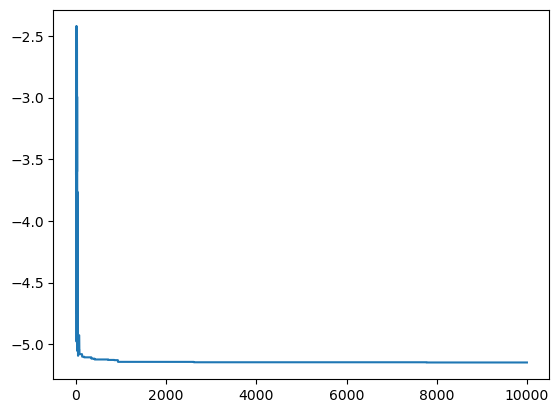

In [16]:
plt.plot(value)

In [16]:
y = np.linspace(0+epsilon,1)
x = y+ epsilon
X,Y = np.meshgrid(x,y)
Z = objective_function((X,Y),0.1,0.1)

/tmp/ipykernel_2384429/2390465057.py:19: RuntimeWarning: invalid value encountered in log
  (a - b**2)*(x-y)**2)+((1.0 - x)*np.log((1.0 - x)/10.0)+x*np.log(x)+
/tmp/ipykernel_2384429/2390465057.py:20: RuntimeWarning: invalid value encountered in log
  y * np.log(y) + (x - y) * np.log(x - y) +


In [17]:
Z

array([[-4.82397091, -4.90377138, -4.95782933, ..., -2.5702609 ,
        -2.42469483,         nan],
       [        nan, -4.90377138, -4.97251571, ..., -2.64550558,
        -2.50028738,         nan],
       [        nan,         nan, -4.95782933, ..., -2.70570688,
        -2.56084569,         nan],
       ...,
       [        nan,         nan,         nan, ..., -2.5702609 ,
        -2.50028738,         nan],
       [        nan,         nan,         nan, ...,         nan,
        -2.42469483,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

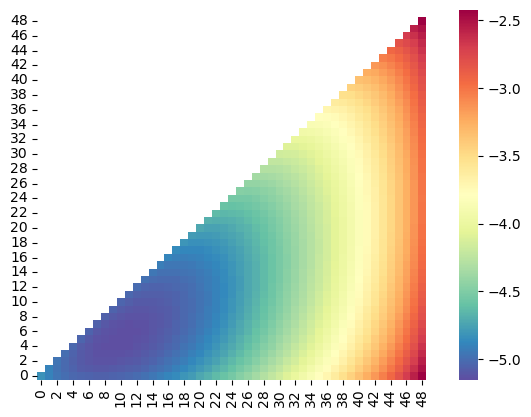

In [18]:
ax = sns.heatmap(Z,cmap='Spectral_r')
ax.invert_yaxis()

In [19]:
np.nanmin(Z)

-5.148828377905631

In [20]:
np.where(Z==np.nanmin(Z))

(array([5]), array([10]))

In [21]:
x[np.where(Z==np.nanmin(Z))[0]], y[np.where(Z==np.nanmin(Z))[1]]

(array([0.12102041]), array([0.21204082]))